# サイモンのアルゴリズム

　このセクションでは、最初にSimon(サイモン)の問題を紹介し、古典コンピューターと量子コンピューターのそれぞれでその問題を解く方法を紹介します。その後、Qiskitを用いて量子アルゴリズムを実装し、シミュレーターとデバイス上で実行してみます。


## Contents

1. [はじめに](#introduction)     
   1.1 [サイモンの問題](#problem)    
   1.2 [サイモンのアルゴリズム](#algorithm)
2. [例](#example)
3. [Qiskit による実装](#implementation)     
   3.1 [シミュレーター上での実行](#simulation)     
   3.2 [実機上での実行](#device)     
4. [量子オラクル](#oracle)
5. [演習](#problems)
6. [参考文献](#references)

## 1. はじめに <a id='introduction'></a>

サイモンのアルゴリズム[1]は、特定の問題を解く古典的なアルゴリズムに比べて指数関数的な高速化を実現した最初の量子アルゴリズムです。このアルゴリズムに触発され、量子フーリエ変換として知られている離散フーリエ変換の量子アルゴリズムが生まれました。これは最も有名な量子アルゴリズムである ショアの素因数分解アルゴリズムの内部で使われています。

### 1.1. サイモンの問題 <a id='problem'> </a>

まず、1対1対応関数、または2対1対応関数 $ f $ を考えます。$ f $ は以下のような特徴を持ちます:

- **1対1対応**: 全ての出力値に対して唯一の入力値が対応する。例えば4つの入力を取る関数は:

$$f(1) \rightarrow 1, \quad f(2) \rightarrow 2, \quad f(3) \rightarrow 3, \quad (4) \rightarrow 4.$$

- **2対1対応**: 全ての出力値に対して、必ず２つの入力値が対応する。例えば4つの入力を取る関数は:

    $$ f(1) \rightarrow 1, \quad f(2) \rightarrow 2, \quad f(3) \rightarrow 1, \quad f(4) \rightarrow 2. $$
    
    この2対1対応写像は、ある秘密ビット列 $ b $ を用いたもので、2つの入力 $ x_1, x_2 $ について $ f(x_1) = f(x_2) $ が成り立つとき、$ x_1 \oplus x_2 = b $ が必ず成り立ちます。ここで $ \oplus $ はビットごとのXORです。


与えられたブラックボックス関数 $ f $ が、1対1対応関数なのか2対1対応関数なのか、どうしたら高速に判定できるでしょうか? さらにもし $ f $ が2対1対応関数の場合、どうしたら高速に $ b $ を特定できるでしょうか? これらは 秘密ビット列 $ b $ を特定する問題に帰着されます。なぜなら $ b={000...} $ の場合は $ f $ は 1対1対応関数とわかり、そうでないなら2対1対応関数と即座にわかるためです。

### 1.2. サイモンのアルゴリズム <a id='algorithm'> </a>

#### 古典的な解法

与えられた関数 $ f $ に対し秘密ビット列 $ b $ が全ての入出力に対して矛盾がないことを確認するためには、最大で $ 2^{n−1}+1 $ 個の入力値と出力値を確認しなければなりません。ここで $ n $ は入力値のビット数です。つまり、同じ出力値に対して２つの入力値を見つけるまで、可能な全ての入力値の半分を確認することを意味しています。Deutsch-Jozsaの問題と同様に、運が良ければ最初の2回の試行だけでこの問題は解決します。しかしもし $ f $ が1対1対応関数だった場合や、2対1対応関数を最も不幸な順で確認した場合に、 $ 2^{n−1}+1 $ 回の確認が必要となります。古典コンピューター上で、回数の下限が $ \Omega(2^{n/2}) $ となるアルゴリズム[2]が知られていますが、やはり必要な確認回数は $ n $ に対して指数関数的に増加します。

#### 量子的な解法

サイモンのアルゴリズムを実装した量子回路を以下に示します。

<img src="images/simon_steps.jpeg" alt="images/simon_steps.jpeg" style="zoom:70%;" width="70%" />

ここで、問い合わせ関数 $ \text{Q}_f $ は、２つの量子レジスター$ \lvert x \rangle, \lvert a \rangle $を入力として働きます。$ \text{Q}_f $ 適用前後の全体の状態は

$$ \lvert x \rangle \lvert a \rangle \rightarrow \lvert x \rangle \lvert a \oplus f(x) \rangle $$

となります。2個目の量子レジスターは状態 $ |0\rangle = |00 \dots 0 \rangle $ で初期化され、そのまま$ \text{Q}_f $ に入力されるため、$ \text{Q}_f $ 適用前後の全体の状態は

$$ \lvert x \rangle \lvert 0 \rangle \rightarrow \lvert x \rangle \lvert f(x) \rangle $$

となります。

このアルゴリズムは以下のステップで実行されていきます。

<ol>

   <li> ２つの $n$ 量子ビットの入力レジスターをゼロに初期化します:
   
   $$\lvert \psi_1 \rangle = \lvert 0 \rangle^{\otimes n} \lvert 0 \rangle^{\otimes n} $$
   
   </li>

   <li> 1つ目のレジスターにアダマール変換を適用します:

   $$\lvert \psi_2 \rangle = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^{n} } \lvert x \rangle\lvert 0 \rangle^{\otimes n}  $$

   </li>

   <li> 問い合わせ関数 $\text{Q}_f$ を適用します: 

   $$ \lvert \psi_3 \rangle = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^{n} } \lvert x \rangle \lvert f(x) \rangle  $$

   </li>
    
   <li> ２つ目の量子レジスタを測定します。ある値 $ f(x) $ が測定されたものとします。この問題の設定上、測定値 $ f(x) $ は２つの入力 $ x $ と $ y = x \oplus b $ に対応します。したがって、1つ目のレジスターは以下のようになります:

   $$\lvert \psi_4 \rangle = \frac{1}{\sqrt{2}}  \left( \lvert x \rangle + \lvert y \rangle \right)$$

   ここで、2つ目のレジスタは測定されているため省略しました。ここで $ \lvert \psi_4 \rangle $ はこれまでの $ 2n $ ではなく $ n $ 量子ビットで構成されていることに注意してください。<br/>

   </li>

   <li> 1つ目のレジスターにアダマール変換を適用します:

   $$ \lvert \psi_5 \rangle = \frac{1}{\sqrt{2^{n+1}}} \sum_{z \in \{0,1\}^{n} } \left[  (-1)^{x \cdot z} + (-1)^{y \cdot z} \right]  \lvert z \rangle  $$
   
   ここで $ x \cdot y $ はドット積と呼ばれる二項演算で、ビットごとの積のXOR $ x_0 y_0 \oplus x_1 y_1 \oplus \cdots \oplus x_n y_n $ の値です。
   
   </li>
    
   <li> 1つ目のレジスターの測定は、以下の出力を与えます:
   
   $$ (-1)^{x \cdot z} = (-1)^{y \cdot z} $$

   つまり
   $$ x \cdot z = y \cdot z \\
     x \cdot z = \left( x \oplus b \right) \cdot z \\
     x \cdot z = x \cdot z \oplus b \cdot z \\
     b \cdot z = 0 \text{ (mod 2)} $$
   
   $ b $ との内積が $ 0 $ となる数値 $ z $ が測定されます。すなわち、このアルゴリズムをおよそ$ n $ 回計算することで、$ n $ 個の異なる $ z $ を得ます。そして、以下のような連立方程式を考えます:
   
   $$ \begin{cases}
      b \cdot z_1 = 0 \\
      b \cdot z_2 = 0 \\
      \quad \vdots \\
      b \cdot z_n = 0
      \end{cases}$$

   この連立方程式を（例えばガウスの消去法などを使って）解くことによって、秘密ビット列$ b $ を特定することができます。

   </li>
</ol>

この問題に対しては、量子アルゴリズムは古典アルゴリズムに比べて指数関数的に少ない回数しか実行されません。繰り返しになりますが、このアルゴリズムの実用的な応用を考えるのは難しいです。しかしながら、このアルゴリズムは具体的な問題の解決を量子コンピューターを利用して指数関数的に高速化した最初の例となり、ショアのアルゴリズムの発見に寄与しました。


## 2. 例  <a id='example'></a>

サイモンのアルゴリズムの実行例を、2 量子ビットで 秘密ビット列 $ b=11 $ の場合について見ていきます。もし $ y = x \oplus b $ ならば、$ f(x) = f(y) $ となるような関数が対象となります。この問題を解く量子回路は以下のようになります。

<img src="images/simon_example.jpeg" alt="images/simon_steps.jpeg" style="zoom:70%;" width="70%" />

<ol>
   <li> ２つの $2$-量子ビットの入力レジスターはゼロで初期化されます:
   
   $$\lvert \psi_1 \rangle = \lvert 0 0 \rangle_1 \lvert 0 0 \rangle_2 $$

   </li>
    
   <li> $ 1 $ 個目のレジスターにアダマールゲートを適用します:
    
   $$\lvert \psi_2 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle_1 + \lvert 0 1 \rangle_1 + \lvert 1 0 \rangle_1 + \lvert 1 1 \rangle_1 \right) \lvert 0 0 \rangle_2 $$

   </li>
    
   <li> 秘密ビット列 $ b = 11 $ に対して、上の図にあるように問い合わせ関数は$\text{Q}_f = CX_{1_a 2_a}CX_{1_a 2_b}CX_{1_b 2_a}CX_{1_b 2_b}$ と実装されます。すなわち、問い合わせ関数適用後の状態は
 
$$
\begin{aligned}
\lvert \psi_3 \rangle  = \frac{1}{2} ( \; 
  & \lvert 0 0 \rangle_1 \; \lvert 0\oplus 0 \oplus 0, & 0 \oplus 0 \oplus 0 \rangle_2 &\\[5pt]
+ & \lvert 0 1 \rangle_1 \; \lvert 0\oplus 0 \oplus 1, & 0 \oplus 0 \oplus 1 \rangle_2 &\\[6pt]
+ & \lvert 1 0 \rangle_1 \; \lvert 0\oplus 1 \oplus 0, & 0 \oplus 1 \oplus 0 \rangle_2 &\\[6pt]
+ & \lvert 1 1 \rangle_1 \; \lvert 0\oplus 1 \oplus 1, & 0 \oplus 1 \oplus 1 \rangle_2 & \; )\\
\end{aligned}
$$
  
したがって、

$$ 
\begin{aligned} 
\lvert \psi_3 \rangle = \frac{1}{2} ( \quad
& \lvert 0 0 \rangle_1  \lvert 0 0 \rangle_2 & \\[6pt]
+ & \lvert 0 1 \rangle_1 \lvert 1  1 \rangle_2 & \\[6pt]
+ & \lvert 1 0 \rangle_1 \lvert  1   1  \rangle_2 & \\[6pt]
+ & \lvert 1 1 \rangle_1 \lvert 0 0 \rangle_2 & \; )\\
\end{aligned}
$$
となります。
   </li>
   
   <li> ここで、2 つ目のレジスターを測定します。$ 50\% $ の確率で $\lvert  00  \rangle_2 $ または $ \lvert 11 \rangle_2 $ が測定されます。ここでは $\lvert 11 \rangle_2$ が測定されたものと仮定します。状態ベクトルは以下のようになります：

   $$ \lvert \psi_4 \rangle = \frac{1}{\sqrt{2}}  \left( \lvert  0   1  \rangle_1 + \lvert  1   0  \rangle_1 \right)  $$

ここで、$ 2 $ つ目のレジスターは測定されているため省略して表記しました。

   </li>
    
   <li> 1つ目のレジスターにアダーマール変換を適用します。

\begin{eqnarray*}
       \lvert \psi_5 \rangle &=& \frac{1}{2\sqrt{2}} \left[ \left( \lvert 0 \rangle + \lvert 1 \rangle \right) \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right) + \left( \lvert 0 \rangle - \lvert 1 \rangle \right) \otimes \left( \lvert 0 \rangle + \lvert 1 \rangle \right)  \right] \\
    &=&  \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle_1 - \lvert 0 1 \rangle_1 + \lvert 1 0 \rangle_1 - \lvert 1 1 \rangle_1   + \lvert 0 0 \rangle_1 + \lvert 0 1 \rangle_1 - \lvert 1 0 \rangle_1 - \lvert 1 1 \rangle_1 \right] \\
    &=& \frac{1}{\sqrt{2}} \left( \lvert 0 0 \rangle_1 - \lvert 1 1 \rangle_1 \right)
\end{eqnarray*}

    
   </li>
    
   <li> このあと1つ目のレジスターを測定すれば、$\lvert 0 0 \rangle_1 $ または $\lvert 11 \rangle_1 $ を得ます。
   </li>

   <li>ここでは $ \lvert 11 \rangle_1 $ を測定したものとすると、
   
   $$ b \cdot 11 = 0 $$

   という方程式が一つ得られます。これにより、$ b $ は $ 01 $ でもなく $ 10 $ でもない事がわかります。すなわち求める $ b $ は $ 00 $ または $ 11 $ だとわかります。$ b $ は $ 2 $ ビットなので、これだけでは特定することができません。もう一つの方程式が得られるまで何回かアルゴリズムを実施する必要があります。何回か実行して、以下のような2種類の方程式を得られたとします。

   $$ b \cdot 11 = 0 $$
   $$ b \cdot 00 = 0 $$
        
   この連立方程式を満たす $ b $ を求めれば $ 11 $ ただ一つに定まります。
   得られた $ b=11 $ は適当に選んだ入力 $x_i$ とその出力 $ f(x_i) = f(x_i \oplus b) $ を調べることで検証できます。例えば、

   $$ 01 \oplus b = 10 $$
   $$ f(01) = f(10) = 11 .$$

   </li>
</ol>

## 3. Qiskit による実装 <a id='implementation'></a>

$ 3 $ 量子ビット、秘密ビット列 $ b=110 $ の場合を解く サイモンのアルゴリズムを qiskit で実装します。

In [0]:
# Qiskit をインポートする
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute

# 基本的なプロットツールをインポートする
from qiskit.visualization import plot_histogram

# Simonオラクルをインポートする
from qiskit_textbook.tools import simon_oracle

上でインポートされる関数 `simon_oracle` はビット列 $ b $ に対応するSimonオラクルを生成する関数です。ここでは説明無しで使用しますが、 [section 4](#oracle)で解説します。インポートするには、[Setting Up Your Environment](../ch-prerequisites/setting-the-environment.html)を参考に`qiskit_textbook`モジュールをインストールする必要があります。

Qiskit では、測定は量子回路の最後で行います。そのため、このSimonのアルゴリズムでは、1つ目のレジスターの測定を最後に移動させます。また、ここでは2つ目のレジスターについては無視します。

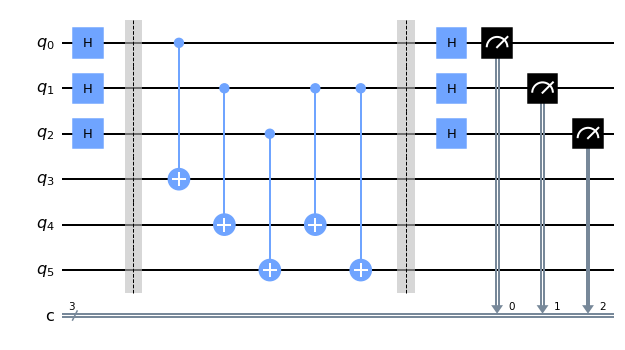

In [1]:
b = '110'

n = len(b)
simon_circuit = QuantumCircuit(n*2, n)

# オラクルに入力する前にアダマールゲートを適用する
simon_circuit.h(range(n))    
    
# 可視性の向上のため、境界を挿入する
simon_circuit.barrier()

simon_circuit += simon_oracle(b)

# 可視性の向上のため、境界を挿入する
simon_circuit.barrier()

# 入力レジスターにアダマールゲートを適用する
simon_circuit.h(range(n))

# 量子ビットを測定する
simon_circuit.measure(range(n), range(n))
simon_circuit.draw(output='mpl')

### 3.1 シミュレーター上での実行  <a id='simulation'></a>

シミューレーターを用いて上記の回路を実行します。

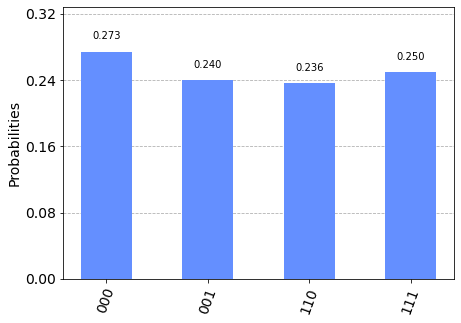

In [2]:
# ローカルシミュレーターを利用する
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(simon_circuit, backend=backend, shots=shots).result()
counts = results.get_counts()
plot_histogram(counts)

3ビット数値の可能性は $ 000 $ から $ 111 $ までの $ 8 $ 種類ですが、ここでは $ z $ として $ 4 $ 種類しか測定されませんでした。以下のように、ビット列 $ b = 110 $ をこの $ z $ で検証すれば、$ 4 $ 種類全てで $ b \cdot z  = 0 \pmod{2}$ が成り立つことがわかります。

In [3]:
# 4つの z の出力とのドット内積を計算し検証する
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

for z in counts:
    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)) )

110.000 = 0 (mod 2)
110.111 = 0 (mod 2)
110.001 = 0 (mod 2)
110.110 = 0 (mod 2)


この得られた4種類の$ z $ を用いて、連立方程式を解いて $ b = 110 $ を求める事ができます。例えば、最初の測定値 `001`から

$$
\require{cancel}
\begin{aligned}
  b \cdot 001 &= 0 \\
  (b_2 \cdot 0) + (b_1 \cdot 0) + (b_0 \cdot 1) & = 0 \\
  (\cancel{b_2 \cdot 0}) + (\cancel{b_1 \cdot 0}) + (b_0 \cdot 1) & = 0 \\
  b_0 & = 0\\
\end{aligned}
$$

すなわち、 $ b_0=0 $ である事がわかります。そして次に `111` を測定し

$$
\require{cancel}
\begin{aligned}
  b \cdot 111 &= 0 \\
  (b_2 \cdot 1) + (b_1 \cdot 1) + (\cancel{0 \cdot 1}) & = 0 \\
  (b_2 \cdot 1) + (b_1 \cdot 1) & = 0 \\
\end{aligned}
$$

が得られ、 $ b_2 = b_1 $ が明らかになります。つまり $ b $ は

$$ b_2 = b_1 = 0, \quad b = 000 $$

または

$$ b_2 = b_1 = 1, \quad b = 110 $$

のいずれかであることがわかります。

このうち自明な解 $ b = 000 $ の場合は $ f $ は1対1対応関数となります。$ b = 110 $ は自明でない解で、この場合は $ f $ は 2対1対応となります。こうした連立方程式は $ O(n^3) $ で動作する[ガウスの消去法](https://mathworld.wolfram.com/GaussianElimination.html) で解くことができます。

### 3.2. 実機上での実行  <a id='device'></a>

[section 3.1](#simulation) の量子回路は $ 2n = 6 $ 量子ビットを使います。しかしこの記事の執筆時、殆どのIBM 量子デバイスは 5 量子ビットしか持っていません。そのため、同じコードを使いますが section2 と同じように$ b = 11 $ を用いれば必要な量子ビット数は $ 4  < 5 $ となり実機の動作範囲に収まります。

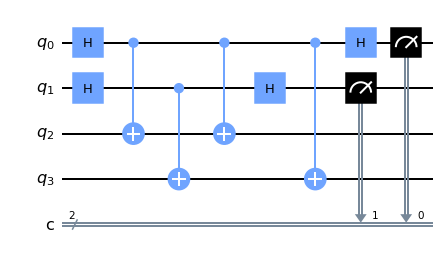

In [4]:
b = '11'
n = len(b)
simon_circuit_2 = QuantumCircuit(n*2, n)

# オラクルに入力する前にアダマールゲートを適用する
simon_circuit_2.h(range(n))

# オラクルに入力する
simon_circuit_2 += simon_oracle(b)

# 入力レジスターにアダマールゲートを適用する
simon_circuit_2.h(range(n))

# 量子ビットを測定する
simon_circuit_2.measure(range(n), range(n))
simon_circuit_2.draw(output='mpl')

この回路は [section 2](#example) と比較すると少し異なります。出力は異なりますが、衝突関係は同じです。すなわち、$ f(x) = f(x \oplus 11) $ が成り立っています。

least busy backend:  ibmqx2
Job Status: job has successfully run


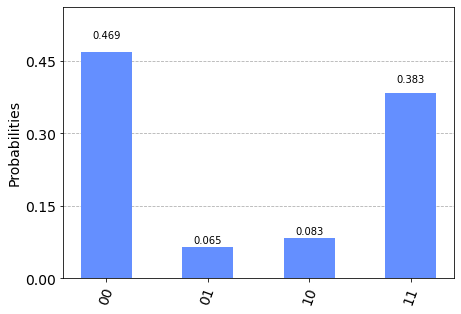

In [5]:
# IBMQ アカウントを読み込み、5 量子ビットのデバイスを取得する
IBMQ.save_account('YOUR_TOKEN')
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

# ジョブを実行し監視する
from qiskit.tools.monitor import job_monitor
shots = 1024
job = execute(simon_circuit_2, backend=backend, shots=shots, optimization_level=3)
job_monitor(job, interval = 2)

# 結果を取得しプロットする
device_counts = job.result().get_counts()
plot_histogram(device_counts)

In [6]:
# 4つの z の出力とのドット内積を計算し検証する
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

print('b = ' + b)
for z in device_counts:
    print( '{}.{} = {} (mod 2) ({:.1f}%)'.format(b, z, bdotz(b,z), device_counts[z]*100/shots))


b = 11
11.00 = 0 (mod 2) (49.2%)
11.11 = 0 (mod 2) (32.0%)
11.10 = 1 (mod 2) (9.1%)
11.01 = 1 (mod 2) (9.7%)


ここで、最も重要な結果は $ b \cdot z = 0$ (mod 2) です。この情報と古典コンピューターを利用して連立方程式を解くことで、秘密ビット列 $ b = 11$ を得ることができます。それ以外の測定結果は間違いですが、低い測定確率を持ちます。間違いを観測することは起こりにくいと仮定すれば、得られた測定値から古典コンピューターを用いて連立方程式を解き、$ b $ を求めることができます。この$ n = 2 $ の場合、$ b = 11 $ です。

## 4. 量子オラクル <a id='oracle'></a>

上のSimonのアルゴリズムの[例](#example)と[実装](#implementation) は、特定の秘密ビット列に特化しています。このアルゴリズムを任意の秘密ビット列に対応するように拡張するには、問い合わせ関数についてより詳細に考察する必要があります。

サイモンのアルゴリズムは秘密ビット列 $ b \in \{0,1\}^n$ を、全ての $x \in \{0,1\}^n$ と対応する $y = x \oplus b $ に対して  $f_b(x) = f_b(y) $ が成り立つようなオラクル $ f_b $ から探し出します。ここで、$\oplus$ はビットごとの XOR 演算子です。したがって、もし $b = 0\ldots 0$ (全てのビットが $0$) ならば、$f_b$ は 1対1対応関数であることがわかります。もし $b \neq 0\ldots 0$ ならば、$f_b$ は 2対1対応関数であることがわかります。

このアルゴリズムでは、オラクルは $|x\rangle |0\rangle$ を入力として受け取ります。事前に定められた $b$ のもと、全ての $x \in \{0,1\}^n$ に対して $f(x) = f(x\oplus b)$ となるようにオラクルは2つめの量子レジスタに書き込み、入力を$|x\rangle|f_s(x)\rangle$ に変換します。

このようなブラックボックス関数は、以下のような手順で実装できます。

1. 1個目のレジスタの内容を2個目のレジスタにコピーします。
$$
|x\rangle|0\rangle \rightarrow |x\rangle|x\rangle
$$

2. **(1対1 または 2対1 写像を作る)** もし $ b $ が $ 0 $ でない場合, $ j $ ビットめの値が $b_j = 1$ となる最も小さなインデックス $ j $ が存在します。もし $x_j = 0$ ならば、$2$個目のレジスターに $ b $ に関して XOR を適用します。そうでなければ、何もしません。
$$
|x\rangle|x\rangle \rightarrow |x\rangle|x \oplus b\rangle ~\mbox{(もし}~x_j = 0~\mbox{ならば)}
$$

3. **(ランダムな置換を行う)** $2$個目のレジスターの量子ビットをランダムに置換します。
$$
|x\rangle|y\rangle \rightarrow |x\rangle|f_b(y)\rangle
$$


## 5. 演習 <a id='problems'></a>

1. Qiskitを使って、一般の サイモンの量子オラクルを実装して下さい。
2. シミュレーターまたは実機上で実装した サイモンの量子オラクルに対して、秘密ビット列 $b=1001$ をテストして下さい。結果が想定通りだったか確認し、どうしてそうなったか説明してみてください。

## 6. 参考文献 <a id='references'></a>

1. Daniel R. Simon (1997) "On the Power of Quantum Computation" SIAM Journal on Computing, 26(5), 1474–1483, [doi:10.1137/S0097539796298637](https://doi.org/10.1137/S0097539796298637)
2. Guangya Cai and Daowen Qiu. Optimal separation in exact query complexities for Simon's problem. Journal of Computer and System Sciences 97: 83-93, 2018, [https://doi.org/10.1016/j.jcss.2018.05.001](https://doi.org/10.1016/j.jcss.2018.05.001)

In [7]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.1',
 'qiskit-aer': '0.7.1',
 'qiskit-ignis': '0.5.1',
 'qiskit-ibmq-provider': '0.11.1',
 'qiskit-aqua': '0.8.1',
 'qiskit': '0.23.1'}

----
翻訳担当: 野ヶ山尊秀 (nogayama @jp.ibm.com)

## 訳注

### [section 1.1](#algorithm) で使用される ドット積とXORの分配法則の証明

Step 6 にて、$ (x \oplus y ) \cdot z = (x \cdot z ) \oplus ( y \cdot z ) $ と変換されていくが、これはドット積とXORの間に分配法則が成り立つためである。以下にこの分配法則を証明する。

$$
\begin{eqnarray*}
(x \oplus y ) \cdot z \
  & = & \bigoplus_{i=0}^{n} ( x_i \oplus y_i ) z_i \\
  & = & \bigoplus_{i=0}^{n} x_i z_i \oplus y_i z_i \\
  & = & \left( \bigoplus_{i=0}^{n} x_i z_i \right) \oplus \left( \bigoplus_{i=0}^{n} y_i z_i \right) \\
  & = & (x \cdot z ) \oplus ( y \cdot z )
\end{eqnarray*}
$$

ここで、$ (x_i \oplus y_i) z_i $ = $ x_i z_i \oplus y_i z_i $ は以下の表を用いて導出した。

| $ x_i $ | $ y_i $ | $ z_i $ | $ x_i \oplus y_i $ | $ x_i z_i $ | $ y_i z_i $ | $ (x_i \oplus y_i) z_i $ | $ x_i z_i \oplus y_i z_i $ |
| ------- | ------- | ------- | ------------------ | ----------- | ----------- | ------------------------ | -------------------------- |
| 0       | 0       | 0       | 0                  | 0           | 0           | 0                        | 0                          |
| 0       | 0       | 1       | 0                  | 0           | 0           | 0                        | 0                          |
| 0       | 1       | 0       | 1                  | 0           | 0           | 0                        | 0                          |
| 0       | 1       | 1       | 1                  | 0           | 1           | 1                        | 1                          |
| 1       | 0       | 0       | 1                  | 0           | 0           | 0                        | 0                          |
| 1       | 0       | 1       | 1                  | 1           | 0           | 1                        | 1                          |
| 1       | 1       | 0       | 0                  | 0           | 0           | 0                        | 0                          |
| 1       | 1       | 1       | 0                  | 1           | 1           | 0                        | 0                          |





### [section 2](#example) の量子回路で構成される関数 $ f $ の$x$に対する値と対応する $ y $ と $ b $ とのドット積

| x    | f(x) | y (=x $ \oplus $ b) | x $ \cdot $ b |
| ---- | ---- | ------------------- | ------------- |
| 00   | 00   | 11                  | 0             |
| 01   | 11   | 10                  | 1             |
| 10   | 11   | 01                  | 1             |
| 11   | 00   | 00                  | 0             |

シミュレーターでは $ x \cdot b = 0 $ となる $ x $ だけが測定される。

### [section 3](#implementation) の量子回路で構成される関数 $ f $ の$x$に対する値と対応する $ y $ と $ b $ とのドット積

| x    | f(x) | y (=x $ \oplus $ b) | x $ \cdot $ b |
| ---- | ---- | ------------------- | ------------- |
| 000  | 000  | 110                 | 0             |
| 001  | 001  | 111                 | 0             |
| 010  | 100  | 100                 | 1             |
| 011  | 101  | 101                 | 1             |
| 100  | 100  | 010                 | 1             |
| 101  | 101  | 011                 | 1             |
| 110  | 000  | 000                 | 0             |
| 111  | 001  | 001                 | 0             |

シミュレーターでは $ x \cdot b = 0 $ となる $ x $ だけが測定される。

### [section 3.2](#device) の量子回路で構成される関数 $ f $ の$x$に対する値と対応する $ y $ と $ b $ とのドット積

| x    | f(x) | y (=x $ \oplus $ b) | x $ \cdot $ b |
| ---- | ---- | ------------------- | ------------- |
| 00   | 00   | 11                  | 0             |
| 01   | 10   | 10                  | 1             |
| 10   | 10   | 01                  | 1             |
| 11   | 00   | 00                  | 0             |

ノイズを持つ実機では $ x \cdot b = 0 $ となる $ x $ の測定確率が高く、そうでない $ x $ の測定確率は低い。
